<a href="https://colab.research.google.com/github/apchavezr/VISUALIZACION_DATOS_TOMA-DECISIONES/blob/main/Visualizacion_IPC_Colombia_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizaci√≥n de datos: Ejemplo pr√°ctico con IPC en Colombia

Este notebook tiene como prop√≥sito ilustrar c√≥mo usar Python para representar datos simulados del IPC (√çndice de Precios al Consumidor) en Colombia.

A lo largo del ejercicio:
- Se generar√° un conjunto de datos simulados.
- Se organizar√° la informaci√≥n por fecha y categor√≠a.
- Se realizar√°n visualizaciones con Matplotlib, Seaborn y Plotly.

üëâ Este material es ideal para cursos de **Visualizaci√≥n de Datos para la Toma de Decisiones**.

In [1]:
# Paso 1: Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Paso 2: Crear un conjunto de datos simulado
Simularemos datos mensuales del IPC para cinco categor√≠as entre 2019 y 2023.

In [8]:
# Generar datos simulados
np.random.seed(42)
fechas = pd.date_range(start='2019-01-01', end='2023-12-01', freq='MS')
categorias = ['Alimentos', 'Vivienda', 'Transporte', 'Salud', 'Educaci√≥n']
data = {
    'Fecha': np.tile(fechas, len(categorias)),
    'Categor√≠a': np.repeat(categorias, len(fechas)),
    'IPC': np.random.normal(loc=100, scale=10, size=len(fechas)*len(categorias))
}
df_ipc = pd.DataFrame(data)
df_ipc['IPC'] = df_ipc['IPC'].clip(lower=80, upper=130)
df_ipc.head()

Fecha  Categor√≠a         IPC
0 2019-01-01  Alimentos  104.967142
1 2019-02-01  Alimentos   98.617357
2 2019-03-01  Alimentos  106.476885
3 2019-04-01  Alimentos  115.230299
4 2019-05-01  Alimentos   97.658466

## Paso 3: Visualizar la tendencia promedio del IPC con Matplotlib y Seaborn

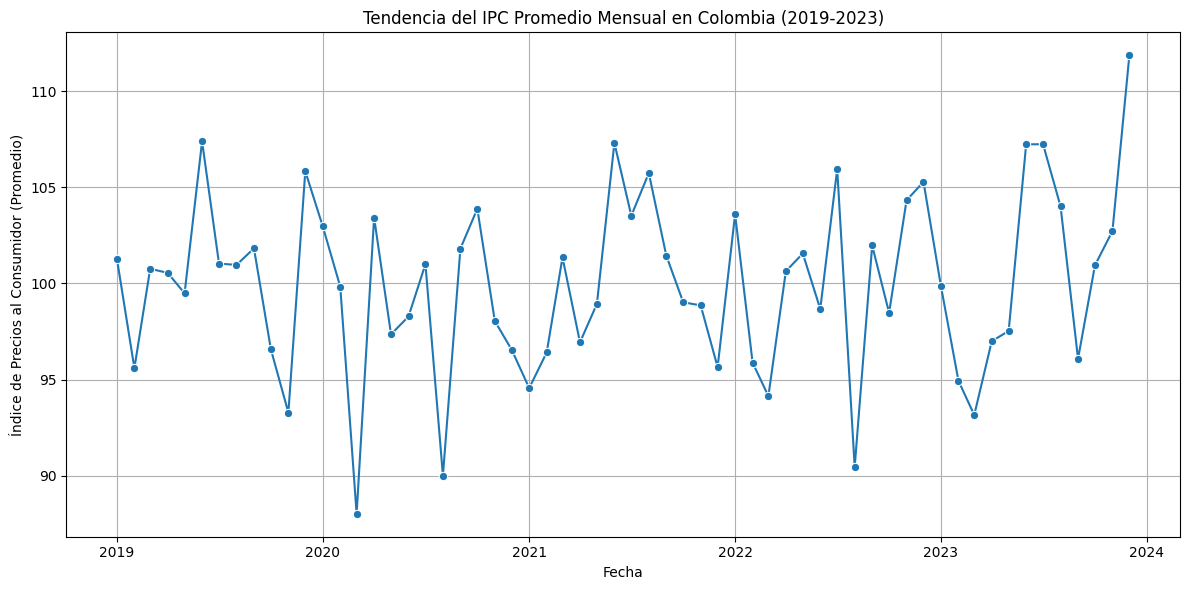

In [3]:
# Promedio mensual
df_summary = df_ipc.groupby('Fecha')['IPC'].mean().reset_index(name='IPC Promedio')

# Gr√°fico de l√≠nea
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_summary, x='Fecha', y='IPC Promedio', marker='o')
plt.title('Tendencia del IPC Promedio Mensual en Colombia (2019-2023)')
plt.xlabel('Fecha')
plt.ylabel('√çndice de Precios al Consumidor (Promedio)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Paso 4: Visualizaci√≥n interactiva con Plotly por categor√≠a

In [4]:
fig = px.line(df_ipc, x='Fecha', y='IPC', color='Categor√≠a',
              title='Evoluci√≥n del IPC por Categor√≠a (2019-2023)',
              labels={'IPC': '√çndice de Precios al Consumidor', 'Fecha': 'Fecha'},
              markers=True)
fig.update_layout(legend_title_text='Categor√≠a',
                  xaxis=dict(tickformat='%Y-%m'),
                  hovermode='x unified')
fig.show()

## Paso 5: An√°lisis de evoluci√≥n del IPC por categor√≠a
En esta secci√≥n se realiza un an√°lisis detallado con base en el conjunto de datos simulado del IPC.

### Pregunta 1: ¬øQu√© categor√≠a tiene el mayor IPC promedio?

In [5]:
# Calcular el IPC promedio por categor√≠a
promedios_categoria = df_ipc.groupby('Categor√≠a')['IPC'].mean().reset_index()
promedios_categoria.sort_values(by='IPC', ascending=False)

Categor√≠a         IPC
3  Transporte  100.919143
2       Salud  100.430211
4    Vivienda  100.066457
1   Educaci√≥n  100.025546
0   Alimentos   98.453453

üîç **Interpretaci√≥n:**
La tabla anterior muestra el promedio del IPC para cada categor√≠a. La categor√≠a con el valor m√°s alto se interpreta como aquella que ha tenido mayor presi√≥n inflacionaria en promedio entre 2019 y 2023.

### Pregunta 2: ¬øSe identifican picos o ca√≠das inusuales en alg√∫n mes o a√±o?

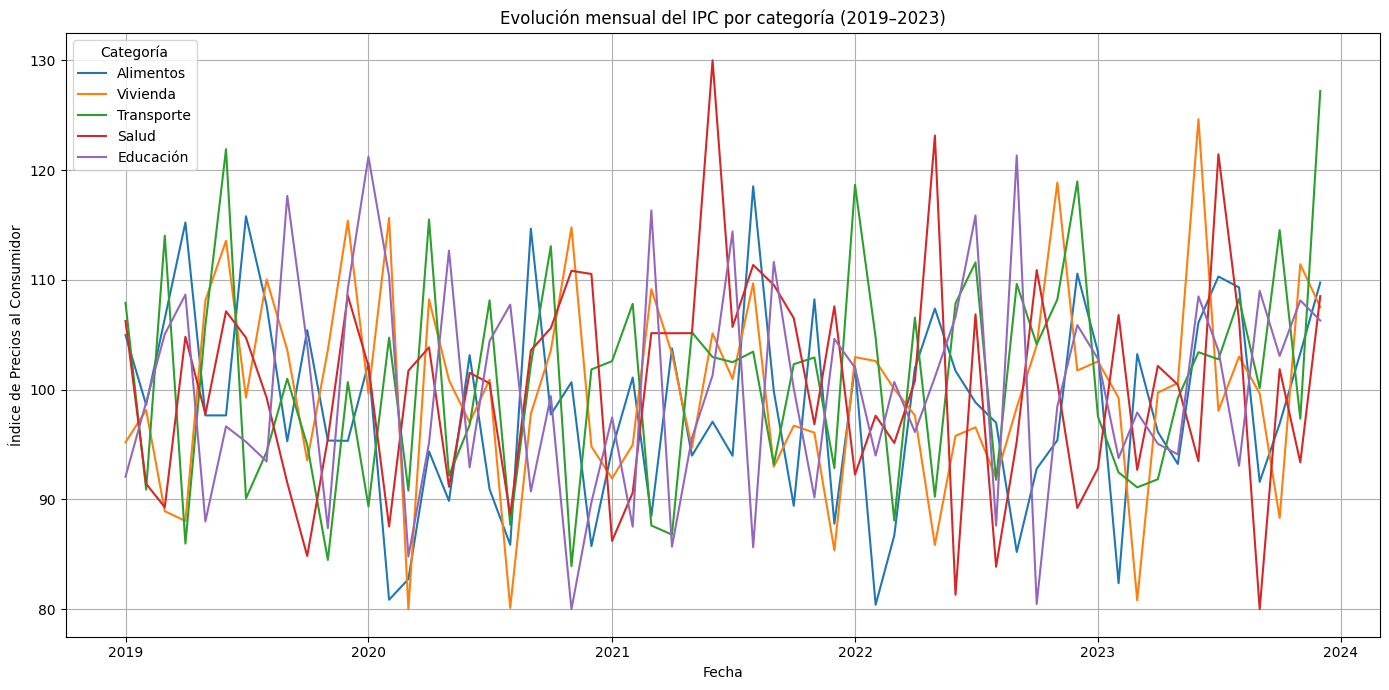

In [7]:
# Gr√°fico de l√≠nea por categor√≠a
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_ipc, x='Fecha', y='IPC', hue='Categor√≠a')
plt.title('Evoluci√≥n mensual del IPC por categor√≠a (2019‚Äì2023)')
plt.xlabel('Fecha')
plt.ylabel('√çndice de Precios al Consumidor')
plt.grid(True)
plt.tight_layout()
plt.show()

üîç **Interpretaci√≥n:**
Observe si alguna categor√≠a presenta picos altos o ca√≠das abruptas. Esto puede indicar un evento particular que afect√≥ los precios en esa categor√≠a durante ese per√≠odo.

### Pregunta 3: ¬øC√≥mo cambiar√≠a la interpretaci√≥n si se usa un gr√°fico de torta en lugar de uno de barras?

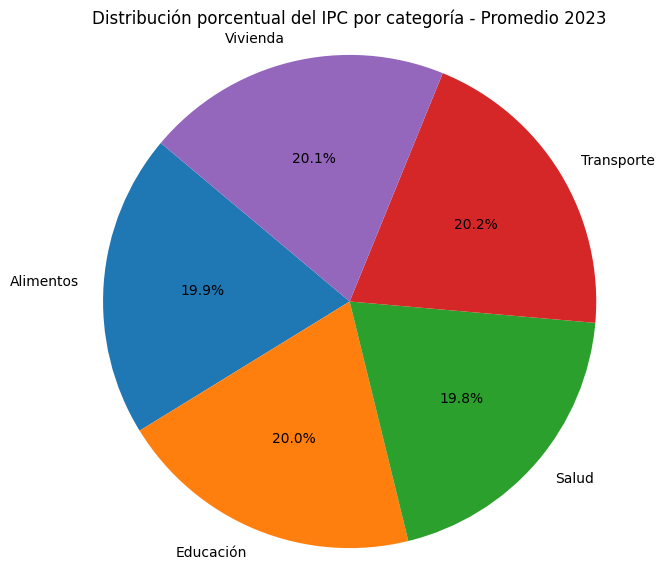

In [6]:
# Promedio de IPC por categor√≠a en 2023
df_2023 = df_ipc[df_ipc['Fecha'].dt.year == 2023]
prom_2023 = df_2023.groupby('Categor√≠a')['IPC'].mean().reset_index()

# Gr√°fico de torta
plt.figure(figsize=(7, 7))
plt.pie(prom_2023['IPC'], labels=prom_2023['Categor√≠a'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuci√≥n porcentual del IPC por categor√≠a - Promedio 2023')
plt.axis('equal')
plt.show()

üîç **Interpretaci√≥n:**
El gr√°fico de torta muestra proporciones relativas. Aunque es √∫til para representar participaci√≥n, **no permite observar tendencias temporales ni comparar valores exactos con precisi√≥n**.
Por tanto, en an√°lisis temporal o comparativo, es preferible un gr√°fico de barras o l√≠neas.